Mean Squared Error on Test Set: 0.16282310645298417


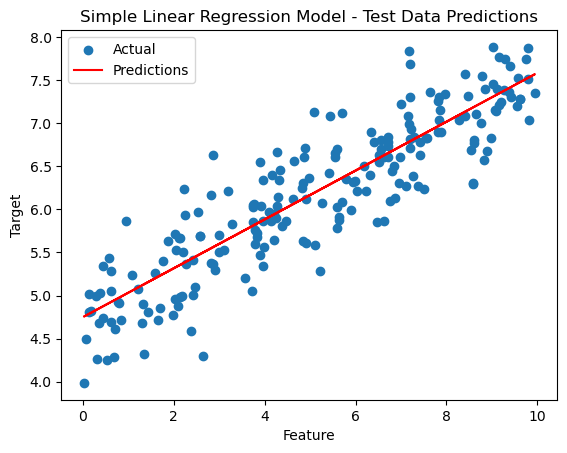

     row_id  prediction
0         0    5.072121
1         1    7.541926
2         2    6.334350
3         3    4.836038
4         4    7.237072
..      ...         ...
445     445    5.215545
446     446    6.648277
447     447    5.672641
448     448    4.862159
449     449    5.227016

[450 rows x 2 columns]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Let's read the whole training dataset first of all
data = pd.read_csv('/Users/nehavpedgaonkar/Downloads/train.csv')  

# Now let's extract input feature (X) and target variable (y)
X = data['feature'].values.reshape(-1, 1)
y = data['target'].values.reshape(-1, 1)

# Splitting the data into training and testing sets in this next step:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #so basically we are using 20% of the data for testing as test_size=0.2

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test] 

#now we'll be defining the simple linear regression model using a very similar format as was mentioned:
class SimpleLinearRegression:
    def __init__(self):
        self.theta = None 
        
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        return X.dot(self.theta)

#now we'll create the model and train it using the training dataset
linear_reg_model = SimpleLinearRegression()
linear_reg_model.fit(X_train_b, y_train)

y_pred = linear_reg_model.predict(X_test_b)

#let's calculate Mean Squared Error (mse) on the test set:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Plot the regression line and scatter plot for the test data with target values against feature values from the dataset
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, "r-", label="Predictions")
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression Model - Test Data Predictions')
plt.legend()
plt.show()

#now let's restart for getting our required predictions' CSV:
#I've copied and pasted so many lines again throughout the code because I initially had not plotted the scatter plot & had done it separately not with getting the csv. So the above & below parts of my code look very similar & repetitive (lol).

train_data = pd.read_csv('/Users/nehavpedgaonkar/Downloads/train.csv')  
test_data = pd.read_csv('/Users/nehavpedgaonkar/Downloads/test.csv')    


X_train = train_data['feature'].values.reshape(-1, 1)
y_train = train_data['target'].values.reshape(-1, 1)

X_test = test_data['feature'].values.reshape(-1, 1)
row_ids = test_data['row_id'].values.reshape(-1, 1)  


X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

class SimpleLinearRegression:
    def __init__(self):
        self.theta = None 
        
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        return X.dot(self.theta)
    
linear_reg_model = SimpleLinearRegression()
linear_reg_model.fit(X_train_b, y_train)

y_pred = linear_reg_model.predict(X_test_b)

#let's create a dataframe (df) with row_id and predictions:
result_df = pd.DataFrame({'row_id': row_ids.flatten(), 'prediction': y_pred.flatten()})

result_df.to_csv('predictions.csv', index=False) #this saves the predictions to a CSV file

print(result_df)